In [53]:
# K nearest neighbors
# comparing euclidian distances to classify new points
# university of california - datasets for machine learning. brest cancer dataset
# C:\Users\Mfornaroli\Downloads\breast-cancer-wisconsin.data

In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, cross_validation, neighbors
# missing values: question mark
col_list = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucl', 'mitosis', 'Class' ]
df = pd.read_csv(r'C:\Users\Mfornaroli\Downloads\breast-cancer-wisconsin.data')
df.columns=col_list

In [55]:
data.head(7)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucl,mitosis,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2


In [56]:
df.Class.unique()

array([2, 4], dtype=int64)

In [57]:
df.replace('?', -99999, inplace=True)  # missing values treated as outliers
# outliers mess a lot with KNN! we'll see
# most algos will treat -99999 as outlier and will treat it like one
# better not to drop all rows with missing data, dude. . . 
df.drop('id', axis=1, inplace=True)

In [58]:
X = np.array(df.drop(['Class'], 1))
y = np.array(df.Class)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

(698, 9)
(698,)


In [59]:
clf = neighbors.KNeighborsClassifier(weights='distance')
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [60]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9785714285714285


In [61]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


# Let's write our own algo of knn 

In [70]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
style.use('fivethirtyeight')

In [81]:
dataset = dict(zip(['b', 'r'], [[[1,2], [2,3], [3,1]], [[6,5],[7,7],[8,6]]]))

In [82]:
print(dataset)
new_feature = [5,7]

{'b': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}


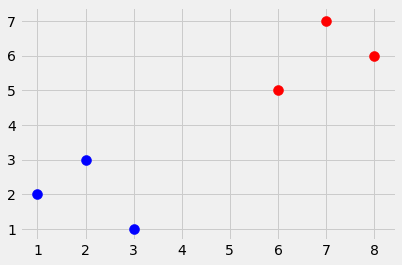

In [83]:
# let's plot our data
for i in dataset: # this corresponds to the key
    for ii in dataset[i]:    # these are elements associated to the key (class)
        plt.scatter(ii[0], ii[1], s=100, color=i)

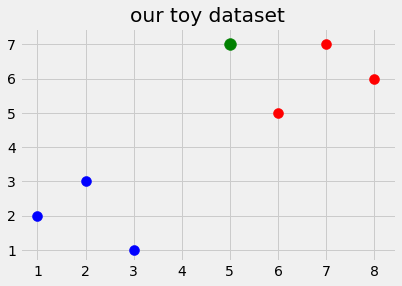

In [133]:
# or we can do it with list comprehension
# 2 for loops together
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.title('our toy dataset')
plt.scatter(new_feature[0], new_feature[1], color='g', s=140)

In [176]:
def k_nearest_neighbor(data, predict, k=3):
    '''
    data = dictionary (key = class), predict = point we want to predict the class of
    '''
    if len(data) >= k:
        warnings.warn('maybe you should increase k? there are more voting classes than k')
    distances = []
    for group in data:
        for features in data[group]:
            #euc_dist = np.sqrt(np.sum((np.array(features) - np.array(predict))**2))
            euclidian_distance = np.linalg.norm(np.array(features) - np.array(predict))
            # we can take advantage of norm function of numpy!
            distances.append([euclidian_distance, group])
#     print("the distances and their relative classes are" ,distances)
    votes = [i[1] for i in sorted(distances)[:k]]  # votes will be a list!
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

In [135]:
result = k_nearest_neighbor(dataset, new_feature, k=3)
print("the point {} belongs to the class --> {}".format(new_feature, results))

the distances and their relative classes are [[6.4031242374328485, 'b'], [5.0, 'b'], [6.324555320336759, 'b'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
the point [5, 7] belongs to the class --> r


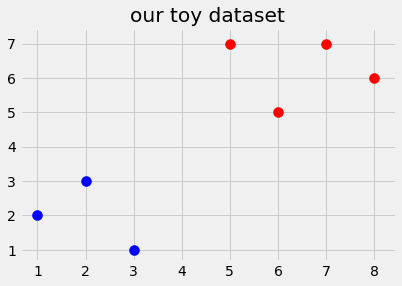

In [136]:
[[plt.scatter(ii[0], ii[1], s=100, color=i) for ii in dataset[i]] for i in dataset]
plt.title('our toy dataset')
plt.scatter(new_feature[0], new_feature[1], color=result, s=100)

# Let's use our algo on a large dataset

In [137]:
import numpy as np
import warnings
import pandas as pd
import random
from collections import Counter

In [210]:
col_list = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucl', 'mitosis', 'Class' ]
df = pd.read_csv(r'C:\Users\Mfornaroli\Downloads\breast-cancer-wisconsin.data')
df.columns=col_list

df.replace('?', -99999, inplace=True) 
df.drop('id', axis=1, inplace=True)
# df.head()
full_data = df.astype(float)
full_data.dtypes
# convert to list  of lists of floats;
full_data = full_data.values.tolist()
# print(full_data[:5])
[print(i) for i in full_data[:5]]
random.shuffle(full_data)
print('\n')
[print(i) for i in full_data[:5]]
print(len(full_data))

[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0]
[3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0]
[6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0]
[4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]
[8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0]


[1.0, 6.0, 8.0, 10.0, 8.0, 10.0, 5.0, 7.0, 1.0, 4.0]
[7.0, 4.0, 4.0, 3.0, 4.0, 10.0, 6.0, 9.0, 1.0, 4.0]
[8.0, 4.0, 4.0, 1.0, 2.0, 9.0, 3.0, 3.0, 1.0, 4.0]
[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0]
[7.0, 6.0, 10.0, 5.0, 3.0, 10.0, 9.0, 10.0, 2.0, 4.0]
698


In [225]:
# we just need to create our dataset populating a dictionary
train_size = 0.80
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}

print(len(full_data))
test_data = full_data[:-int(len(full_data)*train_size)]
print(len(test_data))
train_data = full_data[-int(len(full_data)*train_size):]
print(len(train_data))

for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])  
# print(train_set)
    

698
140
558


In [226]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbor(train_set, data, k=3)
        if group == vote:
            correct += 1
        total +=1
        
print("accuracy: ", correct/total)

accuracy:  0.9571428571428572


In [223]:
correct

134

In [220]:
total

140